In [ ]:
import pandas as pd

df = pd.read_csv("google (1).csv")

In [ ]:
df.head(2)

,wiI7pd
0,"Movie max in Sion is a mall, where you can fin..."
1,"Recently, I had the pleasure of visiting a mov..."


In [ ]:
new_column_names = ['Review']

df.columns = new_column_names

In [ ]:
df.head(2)

,Review
0,"Movie max in Sion is a mall, where you can fin..."
1,"Recently, I had the pleasure of visiting a mov..."


In [ ]:
df.columns

Index(['Review'], dtype='object')

In [ ]:
print(df.head())

                                              Review
0  Movie max in Sion is a mall, where you can fin...
1  Recently, I had the pleasure of visiting a mov...
2  Movie Max PVR Sion, located in Mumbai, is a po...
3  Nice spacious theatre with good seats and view...
4  The multiplex theatre is in close proximity wi...


In [ ]:
print(df.tail())

                                                Review
135         Good experience overall\n\nSound is good …
136    Good theatre. Parking available. Neat and clean
137                     Nice atmosphere. And ambience.
138     Food is costly, cost is more than 7 star hotel
139  Place is good and screen are larger than cubic...


In [ ]:
from textblob import TextBlob
from collections import Counter
import re

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        # Remove newlines and extra whitespaces
        text = re.sub(r'\s+', ' ', text)
        return text
    else:
        return ''

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Return polarity as sentiment
    return analysis.sentiment.polarity

In [ ]:
# Clean text
df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Perform sentiment analysis
df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

# Identify negative reviews
negative_reviews_df = df[df['Sentiment'] < 0]

# Issues identified based on reviews (could be extended)
issues = {
    'Theatre': ['screen','movie','sound','theatre'],
    'Food Court': ['food court', 'food'],
    'Cleanliness': ['maintained', 'cleanliness','pathetic'],
}

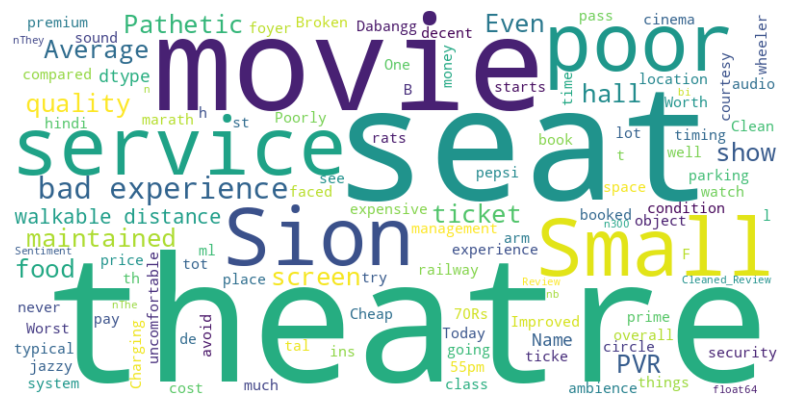

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Provided reviews dataset
reviews = negative_reviews_df.apply(str).tolist()

# Combine all reviews into a single string
text = ' '.join(reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Function to identify issues
def identify_issues(review, issues):
    identified_issues = []
    for issue, keywords in issues.items():
        for keyword in keywords:
            if keyword in review.lower():
                identified_issues.append(issue)
                break
    return identified_issues

In [ ]:
# Apply issue identification
df['Identified_Issues'] = df['Cleaned_Review'].apply(lambda x: identify_issues(x, issues))

# Count frequency of each issue
issue_counter = Counter([issue for sublist in df['Identified_Issues'] for issue in sublist])

# Assign priority based on frequency
priority_list = {issue: index + 1 for index, (issue, _) in enumerate(issue_counter.most_common())}

print("Priority list of issues based on frequency:")
for issue, priority in priority_list.items():
    print(f"{issue}: Priority {priority}")

Priority list of issues based on frequency:
Theatre: Priority 1
Food Court: Priority 2
Cleanliness: Priority 3


In [ ]:
# Count number of negative reviews for each issue
print("\nNumber of negative reviews for each issue:")
for issue, count in issue_counter.items():
    print(f"{issue}: {count}")


Number of negative reviews for each issue:
Theatre: 94
Food Court: 14
Cleanliness: 10
